# <center> 
# <center> 4a. SETAR Simulation
## <center> ECO374

If using Colab, mount Google Drive and set path to files

In [1]:
import os
IN_COLAB = 'COLAB_GPU' in os.environ 
if IN_COLAB:
  from google.colab import drive; mount_path = '/content/drive'
  not os.path.ismount(mount_path) and drive.mount(mount_path)
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Python_code') # Set Python file directory

Set up R for Python

In [2]:
import R_for_Python_setup as RPY
RPY.setup_R()
ro, pandas2ri, StrVector = RPY.initialize_rpy2()
%load_ext rpy2.ipython

R installed
Operating system: Windows
Development tool: Anaconda


Load R packages

In [3]:
R_packages = ['forecast']
RPY.load_R_packages(R_packages)

R packages loaded: forecast


Load Python packages

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1. Simulation

Simulate S-AR(1) data with seasonal lag at frequency 4

In [5]:
%%R
set.seed(2323)
phi1 <- 0.9
phi2 <- 0.3
n <- 500

eps <- stats::rnorm(n, mean=0, sd=0.25)
y <- seq(0,0,length.out=n)

In [6]:
%%R
y[1] <- eps[1]
for (t in 2:n) {
   if (y[t-1]>0)  {
      y[t] <- phi1*y[t-1] + eps[t]
   } 
   else {
      y[t] <- phi2*y[t-1] + eps[t]
   }
}

In [7]:
y = ro.globalenv['y'] # copy data from R to Python

Plot the simulated data

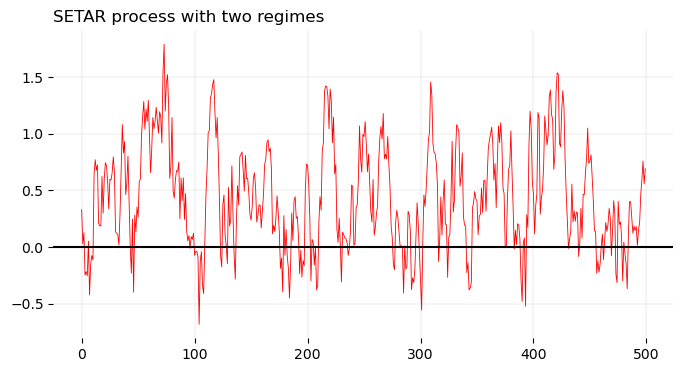

In [8]:
y = pd.DataFrame(y)
plt.figure(figsize=(8, 4))
plt.plot(y, color='red', linewidth=0.6)
plt.title('SETAR process with two regimes', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.axhline(y=0, color='black', linestyle='-')
plt.box(False)
plt.show()

# 2. ACF and PACF

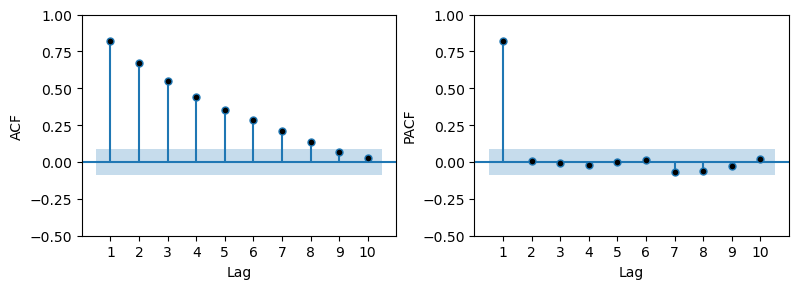

In [9]:
lag_max = 10

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

plot_acf(y, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')

plot_pacf(y, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
          title=None, ax=axs[1])
axs[1].set_ylabel('PACF')

for ax in axs:
    ax.set_ylim(-0.5,1)
    ax.set_xticks(np.arange(1, lag_max+1, step=1))
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show()

ACF and PACF point toward an AR(1) process with high persistence. The data comes from a SETAR process and an AR(1) is misspecified. However, the linear AR(1) model approximation is picking up features of both regimes.

# 3. Automatic model selection for a linear approximation

In [10]:
%%R
forecast::auto.arima(y)

Series: y 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
  0.8165  0.4379
  0.0256  0.0647

0.07205:  log likelihood = -51.43
AIC=108.85   AICc=108.9   BIC=121.49


The `auto.arima()` functions confirms AR(1) as the best-fitting linear approximation to the SETAR draws.